Linear Regression using sklearn dataset and linear_model

In [1]:
from sklearn import datasets,linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sbn

In [2]:
boston=datasets.load_boston()
X=boston.data
Y=boston.target
#print(boston.keys())
#boston.DESCR
#boston.feature_names
#print(boston.data.shape)
#print(boston.target.shape)

C:\Users\Harsh Ranjan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
     

In [3]:
bos=pd.DataFrame(boston.data)
bos.columns=boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


To understand the relation between the target variable and the features we will plot the distribution of the target variable PRICE . We will use the displot function from the seaborn library and then we will create a correlation matrix. We will use heap function to plot it using seaborn library.

In [4]:
bos['PRICE']=boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


C:\Users\Harsh Ranjan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE', ylabel='Density'>

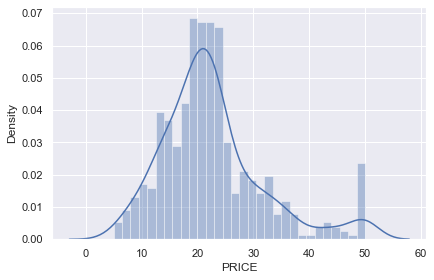

In [5]:
sbn.set(rc={'figure.figsize':(6.7,4.27)})
sbn.distplot(bos['PRICE'],bins=30)


<AxesSubplot:>

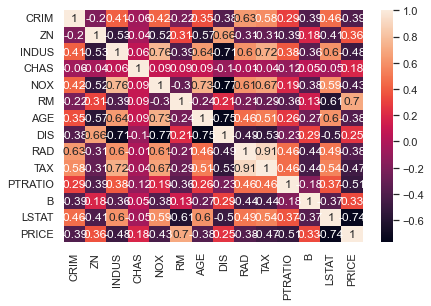

In [6]:
corellation_matrix=bos.corr().round(2)
sbn.heatmap(data=corellation_matrix,annot=True)

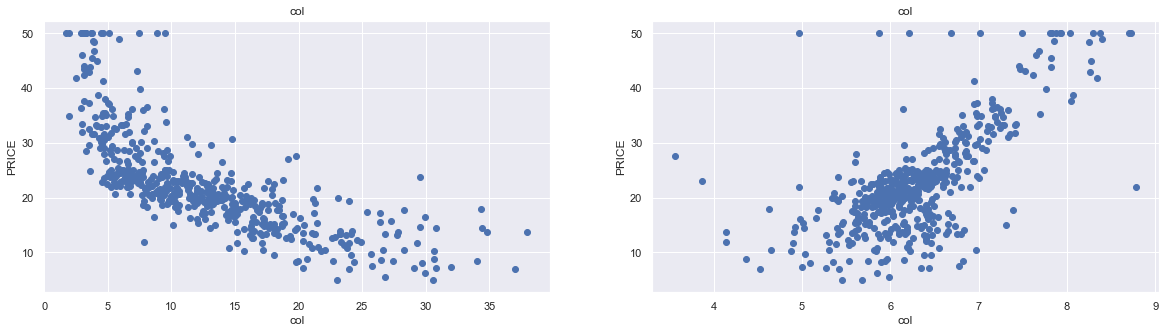

In [7]:
plt.figure(figsize=(20,5))
features=['LSTAT','RM']
target=bos['PRICE']
for i, col in enumerate(features):
    plt.subplot(1,len(features),i+1)
    x=bos[col]
    y=target
    plt.scatter(x,y,marker='o')
    plt.title('col')
    plt.xlabel('col')
    plt.ylabel('PRICE')

In [8]:
import numpy as np
X=pd.DataFrame(np.c_[bos['LSTAT'],bos['RM']],columns=['LSTAT','RM'])
Y=bos['PRICE']

In [9]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [10]:
reg=linear_model.LinearRegression().fit(x_train,y_train)
y_pred=reg.predict(x_test)

In [11]:
en=enumerate(x_train.columns)
en

In [12]:
for i, col_name in enumerate(x_train.columns):
    print('The coefficient for {} is {}'.format(col_name,reg.coef_[i]))

The coefficient for LSTAT is -0.6274816381672722
The coefficient for RM is 5.834306229951864


In [13]:
from sklearn.metrics import mean_squared_error
print('Mean Square Error : %.3f'%mean_squared_error(y_test,y_pred))

Mean Square Error : 39.412


In [14]:
print(reg.score(x_test,y_test))

0.5443708590562406
